In [1]:
import numpy as np
import matplotlib.pyplot as plt

# %config Completer.use_jedi = False


In [2]:
def generate_linear(n=100):
    import numpy as np
    pts = np.random.uniform(0, 1, (n, 2)) # 從(0,1)中透過uniform分配取出n個2維的點
    inputs = []
    labels = []
    for pt in pts:
        inputs.append([pt[0], pt[1]])
        distance = (pt[0]-pt[1])/1.414
        if pt[0] > pt[1] :
            labels.append(0)
        else:
            labels.append(1)
    return np.array(inputs), np.array(labels).reshape(n, 1) # reshape完後變成row=100,clo=1的陣列

def generate_XOR_easy():
    import numpy as np
    inputs = []
    labels = []    

    for i in range(11):
        inputs.append([0.1*i, 0.1*i])
        labels.append(0)

        if 0.1*i==0.5 :
            continue
        inputs.append([0.1*i, 1-0.1*i])
        labels.append(1)
    return np.array(inputs), np.array(labels).reshape(21,1)

def show_result(x,y,pred_y):
    import  matplotlib.pyplot as plt
    plt.subplot(1,2,1)
    plt.title('ground truth', fontsize=18)
    for i in range(x.shape[0]):
        if y[i] == 0:
            plt.plot(x[i][0], x[i][1], 'ro')
        else:
            plt.plot(x[i][0], x[i][1], 'bo')
    plt.subplot(1,2,2)
    plt.title('Predict result', fontsize=18)
    for i in range(x.shape[0]):
        if pred_y[i] ==0:
            plt.plot(x[i][0], x[i][1], 'ro')
        else:
            plt.plot(x[i][0], x[i][1], 'bo')
    plt.show()

def sigmoid(x):
    return 1.0 / (1.0+np.exp(-x))

def derivative_sigmoid(x):
    return np.multiply(x, 1.0-x)

In [3]:
# Assume both hidden layer's width is 4

# x,y_ =generate_linear(n=100)
x,y_ =generate_XOR_easy()

class Model():
    def __init__(self, dims):
        self.weight = [
            np.random.uniform(size=(dims[i], dims[i+1]))
            for i in range(len(dims) - 1)]


In [4]:
m = Model([2,4,4,1])

In [5]:
y1 = np.zeros([y_.size,4])
z1 = np.zeros([y_.size,4])
y2 = np.zeros([y_.size,4])
z2 = np.zeros([y_.size,4])
y3 = np.zeros([y_.size,1])
y  = np.zeros([y_.size,1])
pred_y = np.zeros([y_.size,1])
        

lr = 0.1
itr = 10000
loss= np.zeros([itr,1])


for epoch in range (itr):
    
    for i in range (y.size):

        # forward propagation
        y1[i] = x[i]  @ m.weight[0]
        z1[i] = sigmoid(y1[i])
        y2[i] = z1[i] @ m.weight[1]
        z2[i] = sigmoid(y2[i])
        y3[i] = z2[i] @ m.weight[2]
        y[i]  = sigmoid(y3[i])
        loss[epoch] = np.square(np.subtract(y, y_)).mean()
        # backward propagation
        dldy3  = 2*(y[i]-y_[i])  *derivative_sigmoid(y[i])
        dldw3  = z2[i] * dldy3

        dldy2  = (m.weight[2].T * dldy3) * derivative_sigmoid(z2[i])
        dldw2  = z1[i].reshape(4,1) @ dldy2

        dldy1  = (dldy2 @ m.weight[1].T) * derivative_sigmoid(z1[i])
        dldw1  = x[i].T.reshape(2,1) @ dldy1

        #update the weight
        m.weight[2] -= lr*dldw3.reshape(4,1)
        m.weight[1] -= lr*dldw2
        m.weight[0] -= lr*dldw1
    if(epoch%500==0):
        for i in range (y_.size):
            if(y[i]>0.5):pred_y[i] = 1
            else:pred_y[i]=0
        count = 0
        for i in range (y_.size):
            if(y_[i]==pred_y[i]):count+=1 
        print("epcoh =",epoch," loss =" , loss[epoch]," Acuuracy = ",count / y_.size)

epcoh = 0  loss = [ 0.35795259]  Acuuracy =  0.47619047619047616
epcoh = 500  loss = [ 0.25492418]  Acuuracy =  0.5238095238095238
epcoh = 1000  loss = [ 0.25245131]  Acuuracy =  0.5238095238095238
epcoh = 1500  loss = [ 0.25018263]  Acuuracy =  0.5238095238095238
epcoh = 2000  loss = [ 0.23913384]  Acuuracy =  0.23809523809523808
epcoh = 2500  loss = [ 0.13865925]  Acuuracy =  0.7619047619047619
epcoh = 3000  loss = [ 0.03068938]  Acuuracy =  1.0
epcoh = 3500  loss = [ 0.0051056]  Acuuracy =  1.0
epcoh = 4000  loss = [ 0.0018616]  Acuuracy =  1.0
epcoh = 4500  loss = [ 0.00102025]  Acuuracy =  1.0
epcoh = 5000  loss = [ 0.00067138]  Acuuracy =  1.0
epcoh = 5500  loss = [ 0.00048847]  Acuuracy =  1.0
epcoh = 6000  loss = [ 0.00037839]  Acuuracy =  1.0
epcoh = 6500  loss = [ 0.00030589]  Acuuracy =  1.0
epcoh = 7000  loss = [ 0.00025501]  Acuuracy =  1.0
epcoh = 7500  loss = [ 0.00021758]  Acuuracy =  1.0
epcoh = 8000  loss = [ 0.00018904]  Acuuracy =  1.0
epcoh = 8500  loss = [ 0.00016

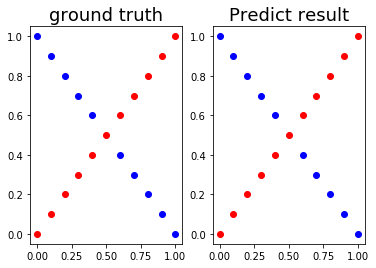

Acuuracy =  1.0


In [8]:
# plot the graph and accurracy
show_result(x,y_,pred_y.reshape(y_.size))

print("Acuuracy = " , count / y_.size)